# Import 

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 248 kB 7.1 MB/s 
     |████████████████████████████████| 3.8 MB 57.3 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 325 kB 54.5 MB/s 
     |████████████████████████████████| 9.9 MB 51.9 MB/s 
     |████████████████████████████████| 1.7 MB 72.9 MB/s 
     |████████████████████████████████| 6.5 MB 67.3 MB/s 
     |████████████████████████████████| 1.2 MB 51.7 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 69.7 MB/s 
     |████████████████████████████████| 895 kB 66.5 MB/s 
     |████████████████████████████████| 144 kB 71.8 MB/s 
     |████████████████████████████████| 181 kB 84.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 81.3 MB/s 
     |████████████████████████████████| 212 kB 78.6 MB/s 
     |████████████████████████████████| 134 kB 69.3 MB/s 
     |███████████████

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
from matplotlib import pyplot as plt

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
!/opt/bin/nvidia-smi

Tue Mar 22 01:56:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# read dataset

##988

In [ ]:

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/4192/Data/DirectCompare/train_df.csv")

train_df = train_df[['selftext','Expert-label']]
train_df

,selftext,Expert-label
0,I posted this on Piazza but thought I might as...,1.0
1,"Hi i’ve applied for arts from Vancouver,BC as ...",0.0
2,i'm an international student and i've been tak...,1.0
3,i'm an international student and the midterm w...,1.0
4,they think i wouldnt be able to handle the str...,0.0
...,...,...
997,My boyfriend is Canadian and I’m American. Obv...,0.0
998,Do you need to be vaccinated to travel domesti...,0.0
999,"Hello, are there any International students he...",1.0
1000,Will you guys take a leave of absence? Or are ...,0.0


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/4192/Data/Validation988/988validation.csv")

test_df = test_df[['selftext']]
test_df

,selftext
0,Well... I think I need some help... about depr...
1,I am an international student and i started en...
2,i'm an international student and the midterm w...
3,"Honestly just want to end it all , it’s so har..."
4,"Hi all, \n\nI'm really upset to know the Winte..."
...,...
983,WE NEED A SCIENCE AND DATA BASED APPROACH TO C...
984,Hi everyone! Hope that all who are applying ar...
985,Hello everyone !\n\nI request some advice from...
986,"Hi, I was wondering what my chances were at th..."


In [ ]:
test_data = test_df['selftext'].values.tolist()

In [ ]:
train_list=[]
train_20 = train_df.iloc[:200]
train_40 = train_df.iloc[:400]
train_60 = train_df.iloc[:600]
train_80 = train_df.iloc[:800]


train_list.append(train_20)
train_list.append(train_40)
train_list.append(train_60)
train_list.append(train_80)
train_list.append(train_df)

##tss

In [ ]:
from sklearn.model_selection import train_test_split
train_df_tss = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/4192/Data/DirectCompare/train_df.csv")

X = train_df_tss[['selftext']]
y = train_df_tss[['Expert-label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_df_tss = pd.concat([X_train, y_train], axis=1)
eval_df_tss = pd.concat([X_test, y_test], axis=1)

In [ ]:
y_test.value_counts()

Expert-label
0.0             106
1.0              95
dtype: int64

In [ ]:
train_list_tss=[]

train_20_tss = train_df_tss.copy().iloc[:200]
train_40_tss = train_df_tss.copy().iloc[:400]
train_60_tss = train_df_tss.copy().iloc[:600]


train_list_tss.append(train_20_tss)
train_list_tss.append(train_40_tss)
train_list_tss.append(train_60_tss)
train_list_tss.append(train_df_tss)

#BERT



##988

In [ ]:
recall_list=[]
model_args = ClassificationArgs(train_batch_size=2, gradient_accumulation_steps=16, learning_rate=3e-5, num_train_epochs= 3, max_seq_length= 512, overwrite_output_dir= True)

In [ ]:
for i in train_list:
  model_bt = ClassificationModel('roberta', 'roberta-base',  args = model_args, use_cuda = True)
  model_bt.train_model(i)
  result_bt,proba_bt = model_bt.predict(test_data)
  result_bt_df = pd.DataFrame(result_bt)
  result_bt_df.columns = ["predict_result"]
  tp = result_bt_df.sum()
  recall_list.append(tp/988)



Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/200 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/400 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/600 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/800 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/400 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/400 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/400 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/1002 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/501 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/501 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/501 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/988 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

##tss

In [ ]:
recall_list_tss=[]
acc_list_tss=[]
pre_list_tss=[]
model_args = ClassificationArgs(train_batch_size=2, gradient_accumulation_steps=16, learning_rate=3e-5, num_train_epochs= 3, max_seq_length= 512, overwrite_output_dir= True)

In [ ]:
for i in train_list_tss:
  model_bt_tss = ClassificationModel('roberta', 'roberta-base',  args = model_args, use_cuda = True)
  model_bt_tss.train_model(i)
  result_bt_tss, model_bt_tss_output, wrong_predictions_bt_tss = model_bt_tss.eval_model(eval_df_tss)
  recall_list_tss.append(result_bt_tss['tp']/95)
  acc_list_tss.append((result_bt_tss['tp']+result_bt_tss['tn'])/201)
  pre_list_tss.append(result_bt_tss['tp']/(result_bt_tss['tp']+result_bt_tss['fp']))



Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/200 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/201 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_512_2_2


Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'tp': 0, 'tn': 106, 'fp': 0, 'fn': 95, 'auroc': 0.6708540218470704, 'auprc': 0.6821268967891678, 'eval_loss': 0.6916222205528846}
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from th

  0%|          | 0/400 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/200 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/201 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_512_2_2


Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.24598725983377534, 'tp': 37, 'tn': 88, 'fp': 18, 'fn': 58, 'auroc': 0.6341608738828203, 'auprc': 0.662996896670951, 'eval_loss': 0.6764585054837741}
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fro

  0%|          | 0/600 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/201 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_512_2_2


Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.16824331427661732, 'tp': 49, 'tn': 69, 'fp': 37, 'fn': 46, 'auroc': 0.6197616683217477, 'auprc': 0.5535272777427247, 'eval_loss': 0.6813357426570013}
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

  0%|          | 0/801 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_512_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/401 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/401 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/401 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/201 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_512_2_2


Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.36963834388417827, 'tp': 80, 'tn': 54, 'fp': 52, 'fn': 15, 'auroc': 0.7099304865938431, 'auprc': 0.6768620709045052, 'eval_loss': 0.6320020235501803}


#Result

In [ ]:
recall_list

[predict_result    0.0
 dtype: float64,
 predict_result    0.104251
 dtype: float64,
 predict_result    0.118421
 dtype: float64,
 predict_result    0.153846
 dtype: float64,
 predict_result    0.229757
 dtype: float64]

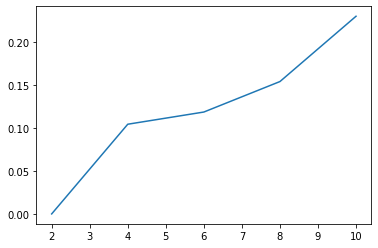

In [ ]:
plt.plot(range(2,11,2),recall_list)

In [ ]:
p_1 = (recall_list[1]-recall_list[0])/recall_list[0]
p_2 = (recall_list[2]-recall_list[1])/recall_list[1]
p_3 = (recall_list[3]-recall_list[2])/recall_list[2]
p_4 = (recall_list[4]-recall_list[3])/recall_list[3]
p_5 = (recall_list[4]-recall_list[0])/recall_list[0]
print('First progress: ' +str(p_1))
print('Second progress: ' +str(p_2))
print('Third progress: ' +str(p_3))
print('Fourth progress: ' +str(p_4))
print('Final progress: ' +str(p_5))

First progress: predict_result    inf
dtype: float64
Second progress: predict_result    0.135922
dtype: float64
Third progress: predict_result    0.299145
dtype: float64
Fourth progress: predict_result    0.493421
dtype: float64
Final progress: predict_result    inf
dtype: float64


In [ ]:
recall_list_tss,acc_list_tss,pre_list_tss

([0.0, 0.3894736842105263, 0.5157894736842106, 0.8421052631578947],
 [0.527363184079602,
  0.6218905472636815,
  0.5870646766169154,
  0.6666666666666666],
 [nan, 0.6727272727272727, 0.5697674418604651, 0.6060606060606061])

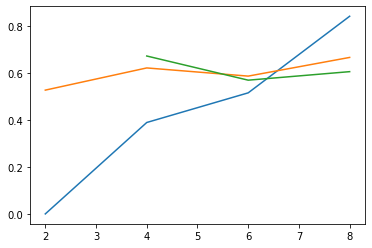

In [ ]:
plt.plot(range(2,9,2),recall_list_tss)
plt.plot(range(2,9,2),acc_list_tss)
plt.plot(range(2,9,2),pre_list_tss)

In [ ]:
p_1_t = (recall_list_tss[1]-recall_list_tss[0])/recall_list_tss[0]
p_2_t = (recall_list_tss[2]-recall_list_tss[1])/recall_list_tss[1]
p_3_t = (recall_list_tss[3]-recall_list_tss[2])/recall_list_tss[2]
p_4_t = (recall_list_tss[3]-recall_list_tss[0])/recall_list_tss[0]

print('First progress: ' +str(p_1_t))
print('Second progress: ' +str(p_2_t))
print('Third progress: ' +str(p_3_t))
print('Final progress: ' +str(p_4_t))

First progress: nan
Second progress: inf
Third progress: 0.7333333333333334
Final progress: inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
p_1_t = (acc_list_tss[1]-acc_list_tss[0])/acc_list_tss[0]
p_2_t = (acc_list_tss[2]-acc_list_tss[1])/acc_list_tss[1]
p_3_t = (acc_list_tss[3]-acc_list_tss[2])/acc_list_tss[2]
p_4_t = (acc_list_tss[3]-acc_list_tss[0])/acc_list_tss[0]

print('First progress: ' +str(p_1_t))
print('Second progress: ' +str(p_2_t))
print('Third progress: ' +str(p_3_t))
print('Final progress: ' +str(p_4_t))

First progress: 0.0
Second progress: 0.132075471698113
Third progress: 0.17500000000000016
Final progress: 0.33018867924528295


In [ ]:
p_1_t = (pre_list_tss[1]-pre_list_tss[0])/pre_list_tss[0]
p_2_t = (pre_list_tss[2]-pre_list_tss[1])/pre_list_tss[1]
p_3_t = (pre_list_tss[3]-pre_list_tss[2])/pre_list_tss[2]
p_4_t = (pre_list_tss[3]-pre_list_tss[0])/pre_list_tss[0]

print('First progress: ' +str(p_1_t))
print('Second progress: ' +str(p_2_t))
print('Third progress: ' +str(p_3_t))
print('Final progress: ' +str(p_4_t))

First progress: nan
Second progress: nan
Third progress: 0.08870523415977964
Final progress: nan
